In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear regresion

In [32]:
x = np.array([0,4.2e-6,8.16e-6,12.48e-6,16.52e-6,20.04e-6,22.6e-6])  #valores del eje x
y = np.array([0.597,0.546,0.517,0.457,0.41,0.371,0.361]) #valores del eje y

n = 1 #grado del polinomio a modelar (n=1 para una línea)
fit,cov = np.polyfit(x,y,n,cov=True)
fit #el modelo


array([-1.08474576e+04,  5.95740920e-01])

Parámetros del modelo (m,b en este caso) y función del modelo (ecuación de la recta en este caso)

In [33]:
m = fit[0] #pendiente de la recta
b = fit[1] #punto de corte con el eje y
fit_function = lambda x: m*x + b #nuestra función quue modela los datos en este caso
_x = np.linspace(np.min(x),np.max(x)) #necesitamos artos puntos entre los valores del eje x para que la curva quede bonita xd
_y = fit_function(_x) #valores del eje y del modelo

Incertidumbres de la pendiente y punto de corte, factor R cuadrado y residuales

In [34]:
cov #es la matriz de covarianza, la diagonal es la varianza de los parámetros del modelo (m y b), la varianza es el cuadrado de la desviación estándar 

array([[ 1.58780039e+05, -1.90536047e+00],
       [-1.90536047e+00,  3.23287047e-05]])

In [35]:
error_m = np.sqrt(cov[0,0]) #desviación estándard de la pendiente
error_b = np.sqrt(cov[-1,-1]) #desviación estándard del punto de corte
np.round((error_m,error_b),2)

array([3.9847e+02, 1.0000e-02])

In [36]:
R2 = (cov[0][1]**2)/(cov[0][0]*cov[1][1]) #definición del factor R cuadrado
R2 #indica que tan bien el modelo se ajusta a los datos, más cerca a 1 mejor

0.7072453355486208

In [37]:
R = y - fit_function(x) #los residuales, es decir que tan lejos están los puntos del modelo

A graficar :D

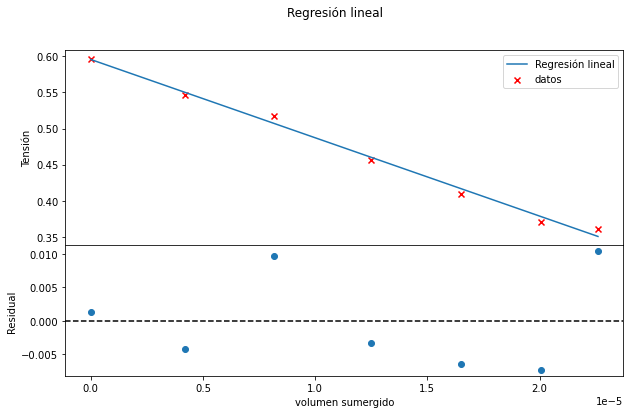

In [38]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle('Regresión lineal')

#axs[0] es la gráfica de arriba donde vamos a graficar los datos
axs[0].scatter(x,y,label='datos', color='red',marker='x') #los datos
axs[0].plot(_x,_y,label='Regresión lineal') #el modelo
axs[0].set_ylabel('Tensión')
axs[0].legend()

#axs[1] es la gráfica del residual
axs[1].scatter(x,R) #residuales
axs[1].axhline(y=0, color='black', linestyle='--') #línea en y=0 pa que se vea bonito xd
axs[1].set_xlabel('volumen sumergido')
axs[1].set_ylabel('Residual')

plt.show()

lo que necesitas reportar sería:

In [39]:
#Datos
m = np.round(m,2)
b = np.round(b,2)
error_m = np.round(error_m,2)
error_b = np.round(error_b,2)
R2 = np.round(R2,2)
print('y = ({m} +/- {error_m})x + ({b} +/- {error_b})'.format(m=m,error_m=error_m,b=b,error_b=error_b))
print('R^2 = {R2}'.format(R2=R2))

y = (-10847.46 +/- 398.47)x + (0.6 +/- 0.01)
R^2 = 0.71
